In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd drive/My \Drive/Datasets/dados-time-series

/content/drive/My Drive/Datasets/dados-time-series


In [ ]:
%ls

alucar.csv  cafelura.csv   dias_final_de_semana.csv  vendas_por_dia.csv
alucel.csv  chocolura.csv  newsletter_alucar.csv


# Alucar - Análise das vendas

In [ ]:
#!pip install seaborn==0.9.0

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.__version__

'0.11.0'

In [ ]:
alucar = pd.read_csv('alucar.csv')
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [ ]:
alucar.shape

(24, 2)

In [ ]:
alucar.isnull().sum()

mes       0
vendas    0
dtype: int64

In [ ]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [ ]:
# converter 
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

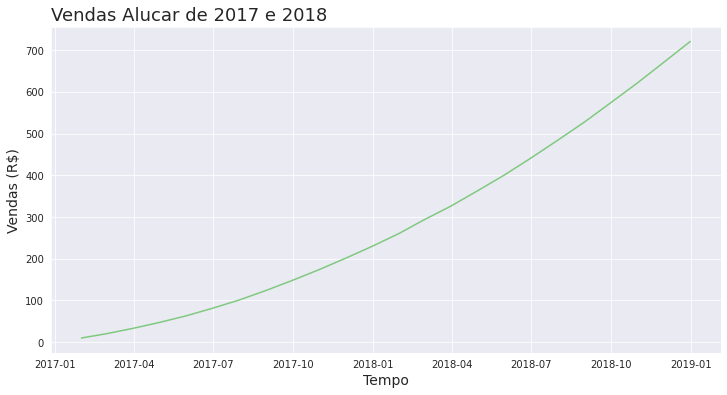

In [ ]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
ax = ax

In [ ]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()


,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


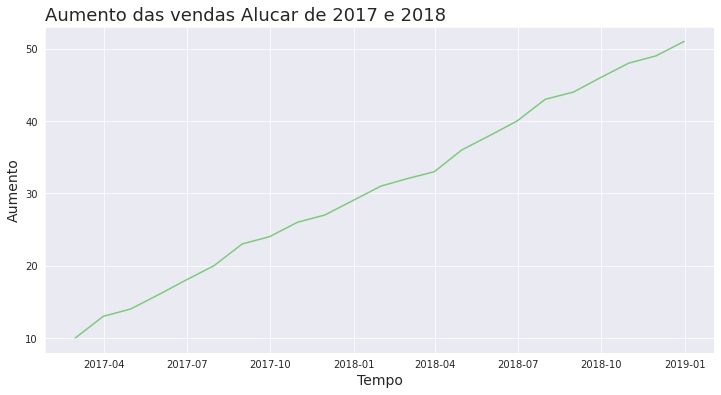

In [ ]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento das vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)
ax = ax

In [ ]:
# função para automatizar os gŕaficos
def line_chart(title, labelx, labely, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data=dataset)
  ax.figure.set_size_inches(12,6)
  ax.set_title(title, loc='left', fontsize=18)
  ax.set_xlabel(labelx, fontsize=14)
  ax.set_ylabel(labely, fontsize=14)
  ax = ax


In [ ]:
# aceleração do crescimento das vendas
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


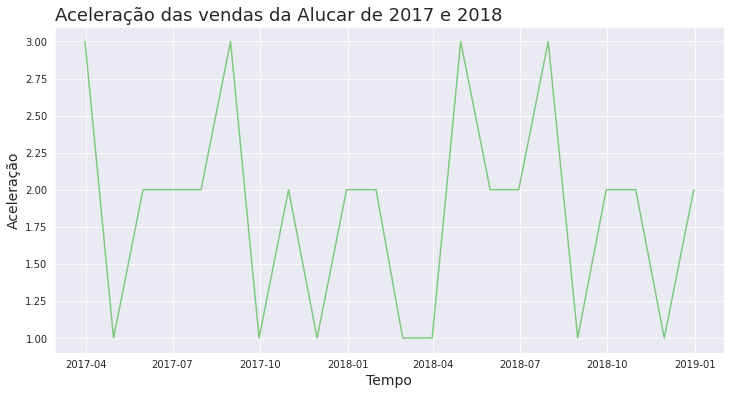

In [ ]:
line_chart('Aceleração das vendas da Alucar de 2017 e 2018','Tempo', 'Aceleração', 'mes', 'aceleracao',alucar)

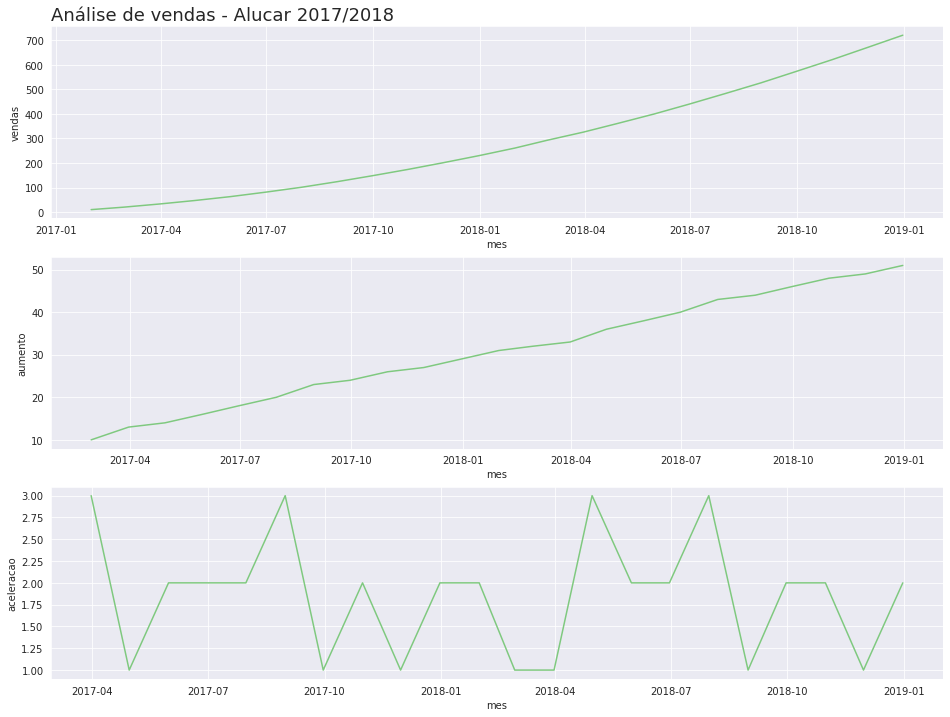

In [ ]:
# colocar os três gŕaficos juntos
plt.figure(figsize=(16,12))
ax = plt.subplot(3, 1, 1)
ax.set_title('Análise de vendas - Alucar 2017/2018', fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3, 1, 2)
sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3, 1, 3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax = ax

In [ ]:
def comparation_plot(x, y1, y2, y3, dataset, title):
  plt.figure(figsize=(16,12))
  ax = plt.subplot(3, 1, 1)
  ax.set_title(title, fontsize=18, loc='left')
  sns.lineplot(x=x, y=y1, data=dataset)
  plt.subplot(3, 1, 2)
  sns.lineplot(x=x, y=y2, data=dataset)
  plt.subplot(3, 1, 3)
  sns.lineplot(x=x, y=y3, data=dataset)
  ax = ax


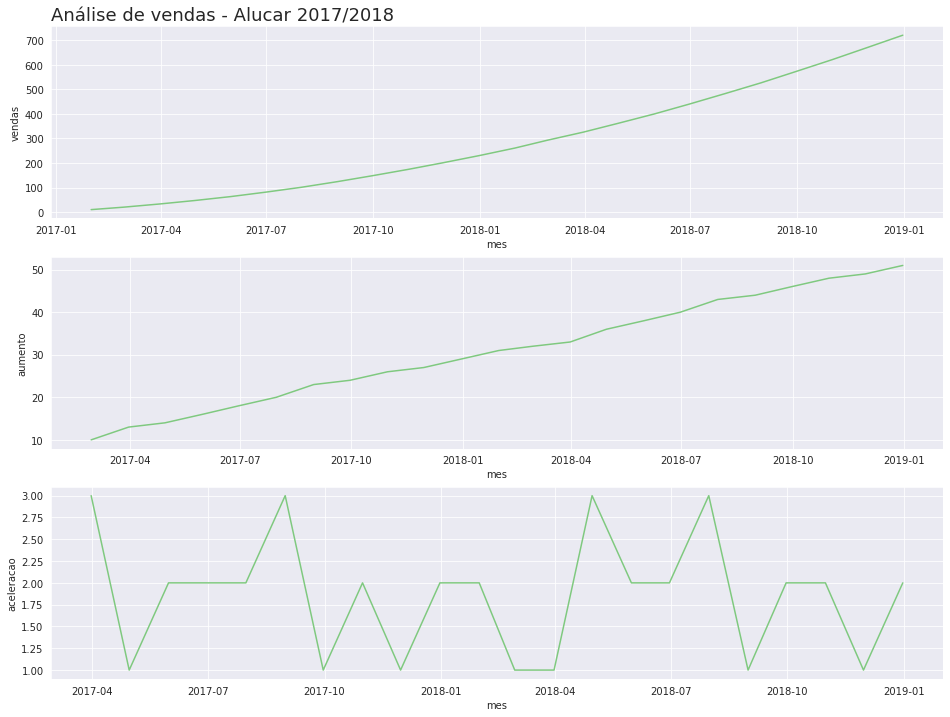

In [ ]:
comparation_plot('mes', 'vendas', 'aumento', 'aceleracao', alucar, 'Análise de vendas - Alucar 2017/2018')

In [ ]:
# examinar a tendencia da time series através dos gráficos

In [ ]:
# autocorrelação
from pandas.plotting import autocorrelation_plot

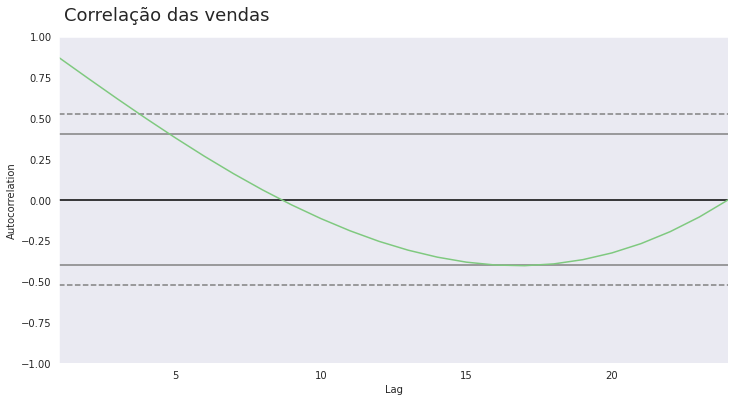

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas', fontsize=18, x=0.25, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

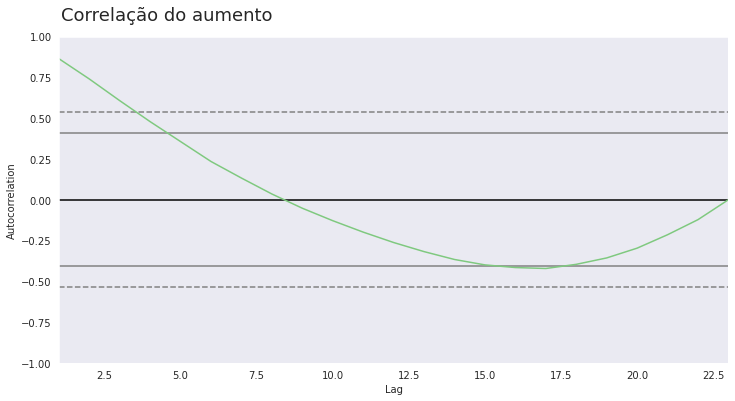

In [ ]:
# correlação alta para o lag até 07
# as vendas de daqui 07 dias ainda possuem correlação com as vendas de hoje
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento', fontsize=18, x=0.25, y=0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

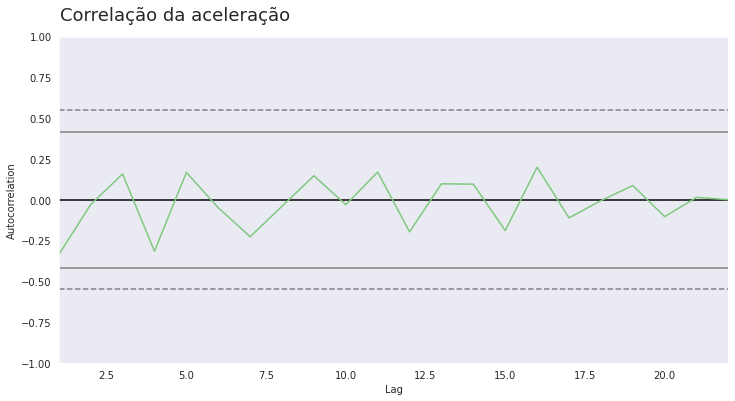

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

In [ ]:
def ar_charts(x, y1, y2, y3, dataset, title):
  


In [ ]:
# A função de autocorrelação é a principal ferramenta de diagnóstico para análise de time series.
# Autocorrelação significa a correlação de valores de uma mesma variável ordenados no tempo.
# A autocorrelação é a correlação cruzada de um sinal com o ele próprio. 
# É uma ferramenta matemática para encontrar padrões de repetição, tal como a presença de um sinal periódico obscurecidos pelo ruído,
# ou para identificar a frequência fundamental em falta num sinal implícita pelas suas frequências harmónicas. 
# É frequentemente utilizada no processamento de sinais para a análise de funções ou série de valores,
# como por exemplo sinais no domínio do tempo.



# Alucar - Analisando assinantes da newsletter

In [ ]:
assinantes = pd.read_csv('newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [ ]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [ ]:
assinantes.shape

(24, 2)

In [ ]:
assinantes.isnull().sum()

mes           0
assinantes    0
dtype: int64

In [ ]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])

In [ ]:
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [ ]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


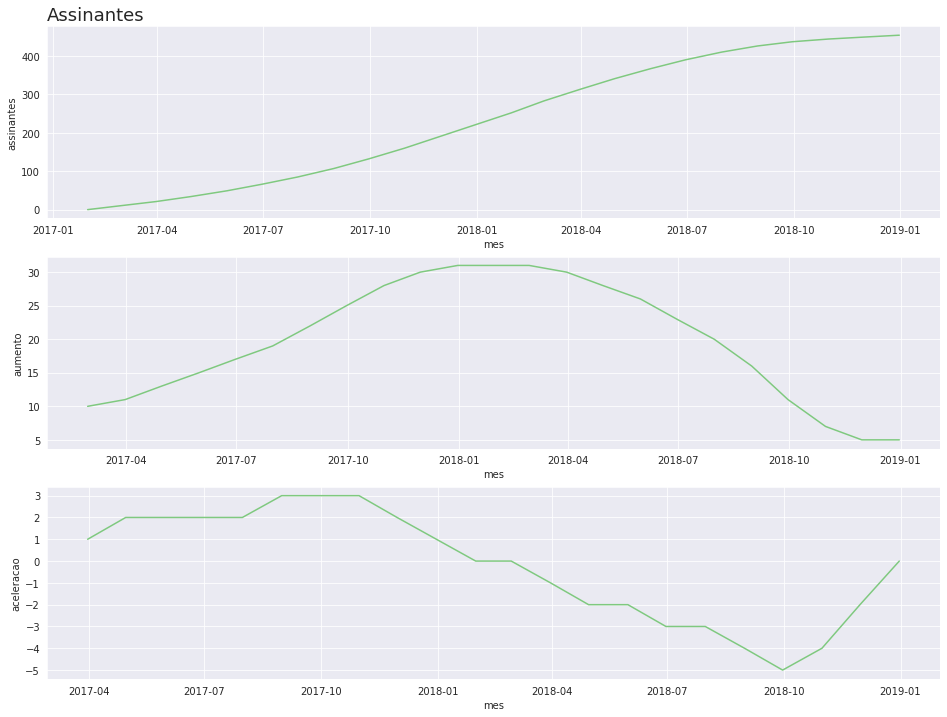

In [ ]:
comparation_plot('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Assinantes')

In [ ]:
# chocolura - não da conta da demanda

In [ ]:
chocolura = pd.read_csv('chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [ ]:
chocolura.shape

(24, 2)

In [ ]:
chocolura.isnull().sum()

mes       0
vendas    0
dtype: int64

In [ ]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [ ]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [ ]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


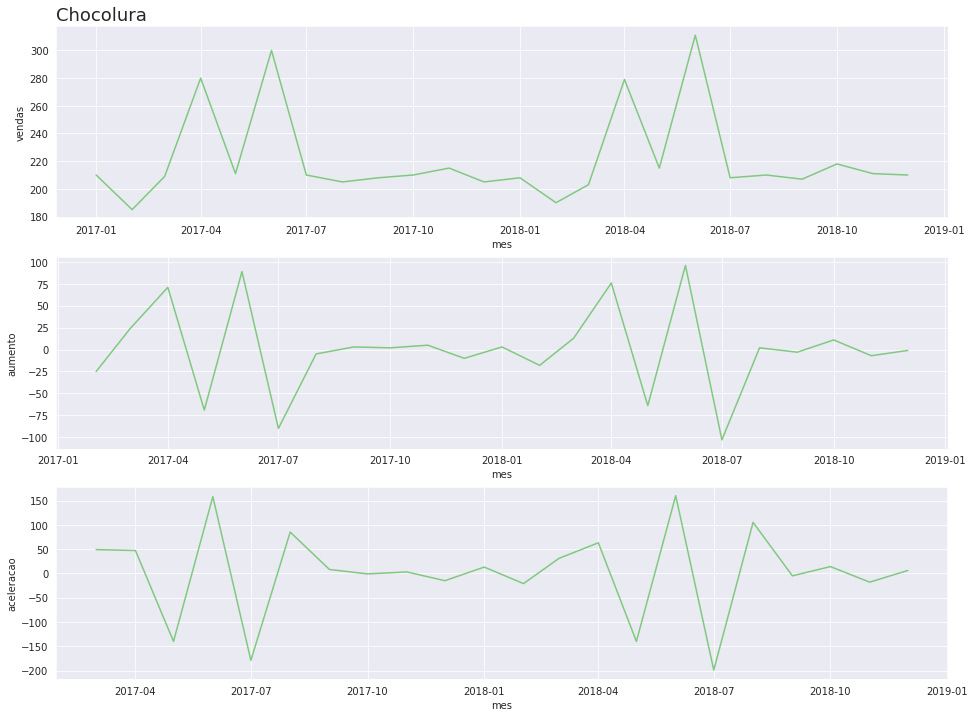

In [ ]:
comparation_plot('mes', 'vendas', 'aumento', 'aceleracao', chocolura, 'Chocolura')

In [ ]:
# sazonalidade - padrão repetitivo dentro de um período específico de tempo
# empresa vende mais chocolate em abril (páscoa) e junho (dia dos namorados) 
# vendas lineares no resto do ano

In [ ]:
%ls

alucar.csv  cafelura.csv   dias_final_de_semana.csv  vendas_por_dia.csv
alucel.csv  chocolura.csv  newsletter_alucar.csv


In [ ]:
# dados de uma loja da chocolura que vendeu muito em outubro e novembro
vendas_por_dia = pd.read_csv('vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [ ]:
vendas_por_dia.shape

(61, 2)

In [ ]:
vendas_por_dia.isnull().sum()

dia       0
vendas    0
dtype: int64

In [ ]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [ ]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [ ]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


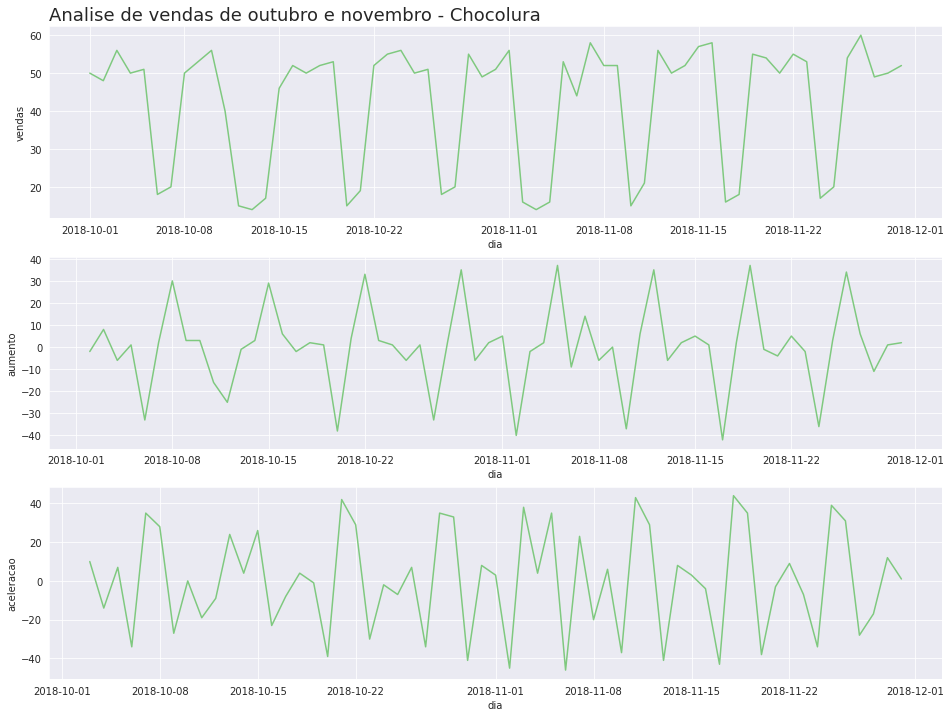

In [ ]:
comparation_plot('dia', 'vendas', 'aumento', 'aceleracao', vendas_por_dia, 'Analise de vendas de outubro e novembro - Chocolura')

In [ ]:
# padrão sazonal novamente
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [ ]:
vendas_por_dia.dia_da_semana.unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [ ]:
dias_traduzidos = {'Monday': 'Segunda', 'Tuesday':'Terca', 'Wednesday': 'Quarta', 
                   'Thursday':'Quinta', 'Friday':'Sexta', 'Saturday':'Sabado',
       'Sunday':'Domingo'}

In [ ]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)
vendas_por_dia.head() 

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta


In [ ]:
vendas_por_dia.head(14) 

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sabado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda
8,2018-10-09,53,3.0,-27.0,Terca
9,2018-10-10,56,3.0,0.0,Quarta


In [ ]:
# vendas caem no final de semana - por que será?

In [ ]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()
vendas_agrupadas

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Sabado,16.0,-28.0,-20.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Terca,52.0,-1.0,-34.0


**Correlação das vendas diárias**

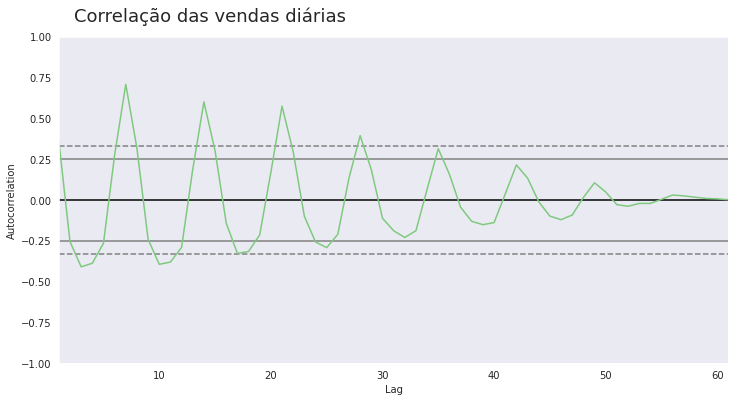

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax=ax

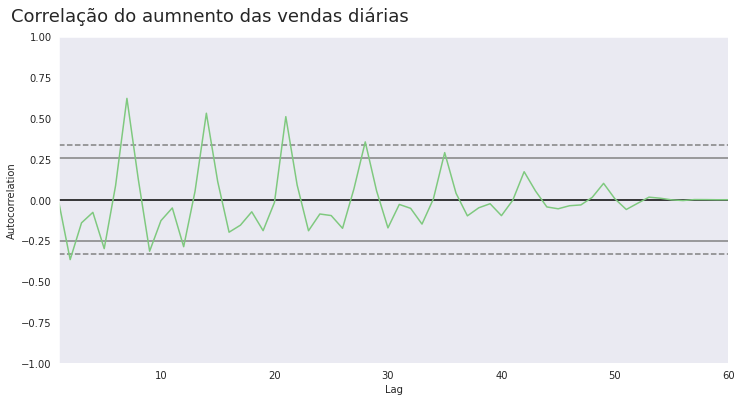

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumnento das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax=ax

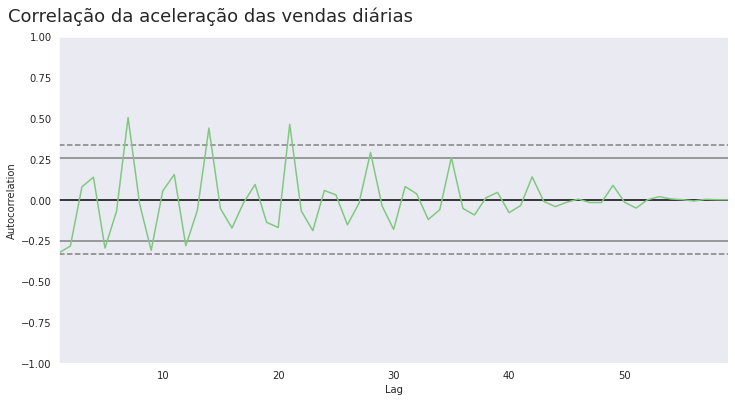

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax=ax

# Cafelura - Análise de vendas

In [ ]:
cafelura = pd.read_csv('cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [ ]:
cafelura.shape

(24, 2)

In [ ]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [ ]:
cafelura.isnull().sum()

mes       0
vendas    0
dtype: int64

In [ ]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

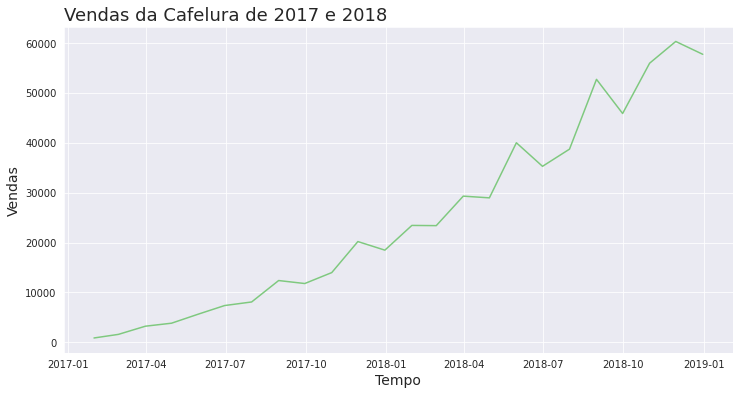

In [ ]:
line_chart('Vendas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas', 'mes', 'vendas', cafelura)

In [ ]:
# normalização da time series
quantidade_de_dias_de_fds = pd.read_csv('dias_final_de_semana.csv')
quantidade_de_dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [ ]:
quantidade_de_dias_de_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [ ]:
cafelura['vendas_normalizadas'] = cafelura['vendas'] / quantidade_de_dias_de_fds['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


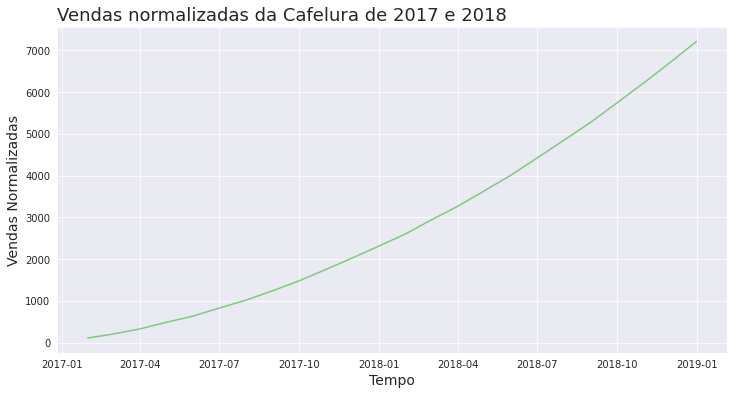

In [ ]:
line_chart('Vendas normalizadas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas Normalizadas', 'mes', 'vendas_normalizadas', cafelura)

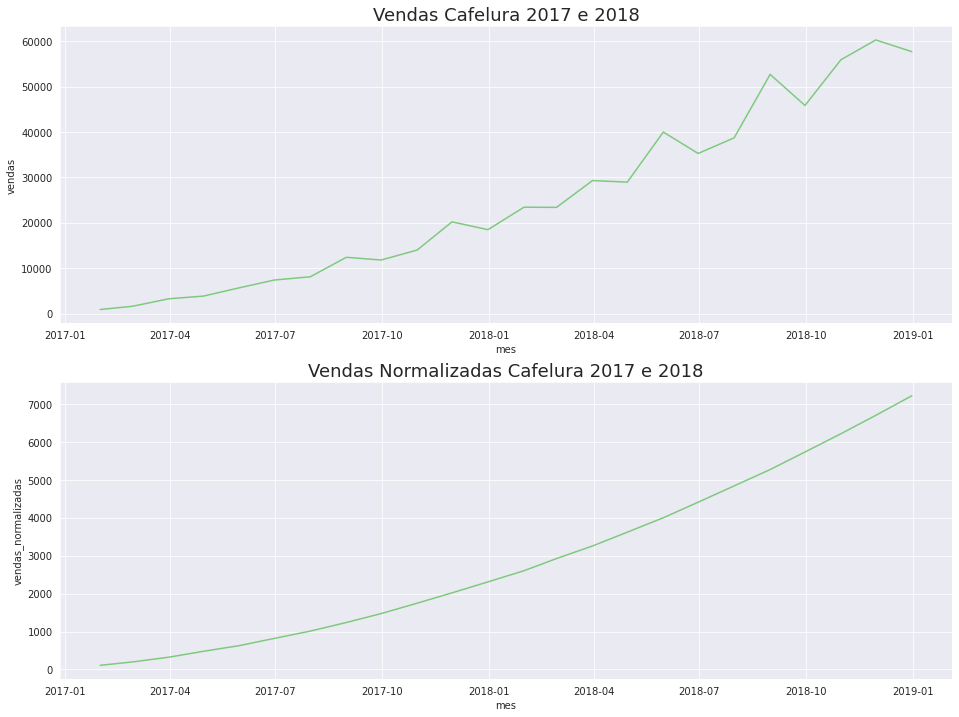

In [ ]:
plt.figure(figsize=(16,12))
ax=plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax=plt.subplot(2,1,2)
ax.set_title('Vendas Normalizadas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
ax=ax

# Statsmodels

In [ ]:
# tendencia, sazonalidade e ruido (sempre presente nas time series)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

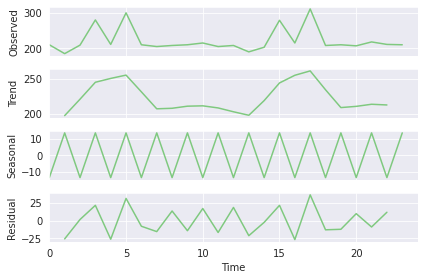

In [ ]:
resultado = seasonal_decompose([chocolura['vendas']], freq=2)
ax = resultado.plot()

In [ ]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [ ]:
data = ({
    'observacao':observacao,
    'tendencia': tendencia,
    'sazonalidade': sazonalidade,
    'ruido':ruido
})

resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210,NaN,-13.386364,NaN
1,185,197.25,13.386364,-25.636364
2,209,220.75,-13.386364,1.636364
3,280,245.00,13.386364,21.613636
4,211,250.50,-13.386364,-26.113636


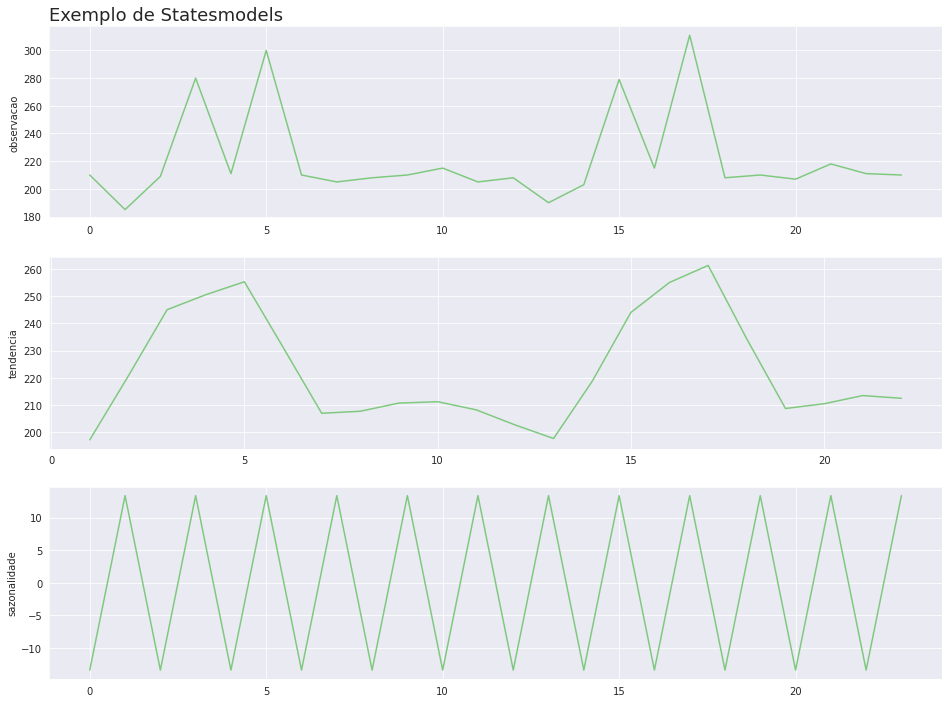

In [ ]:
comparation_plot(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado,
                 'Exemplo de Statesmodels')

# Alucel - Análise de vendas

In [ ]:
alucel = pd.read_csv('alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [ ]:
alucel.shape

(61, 2)

In [ ]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [ ]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [ ]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


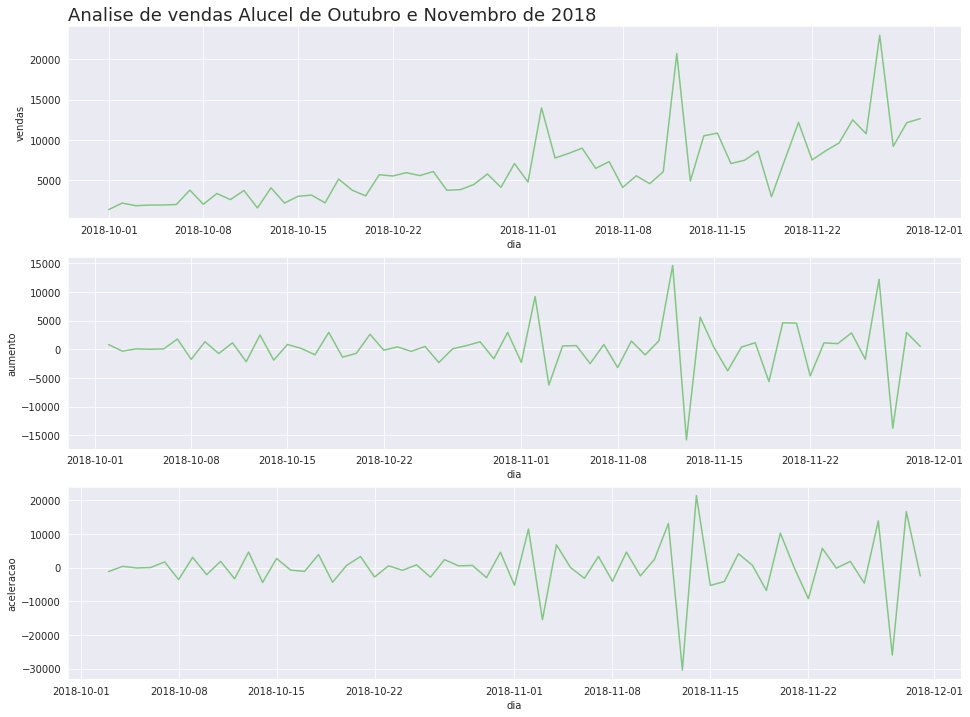

In [ ]:
comparation_plot('dia', 'vendas', 'aumento', 'aceleracao', alucel, 'Analise de vendas Alucel de Outubro e Novembro de 2018')

In [ ]:
# media móvel
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()
alucel.head(10)

,dia,vendas,aumento,aceleracao,media_movel,media_movel_21
0,2018-10-01,1374.83,NaN,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429,NaN
7,2018-10-08,2039.59,-1753.48,-3540.66,2252.827143,NaN
8,2018-10-09,3365.58,1325.99,3079.47,2421.382857,NaN
9,2018-10-10,2616.12,-749.46,-2075.45,2529.348571,NaN


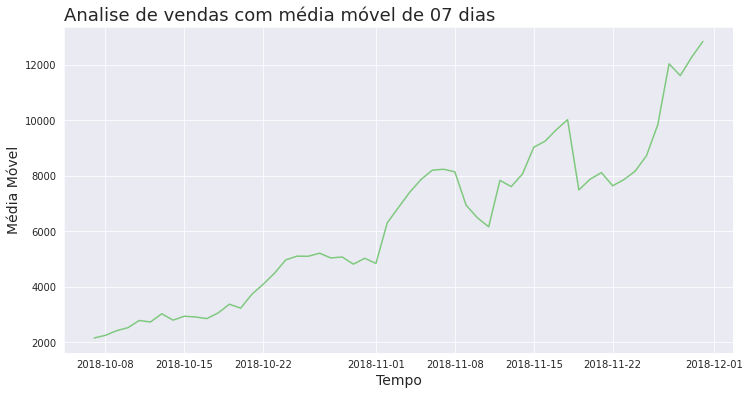

In [ ]:
line_chart('Analise de vendas com média móvel de 07 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel',alucel)

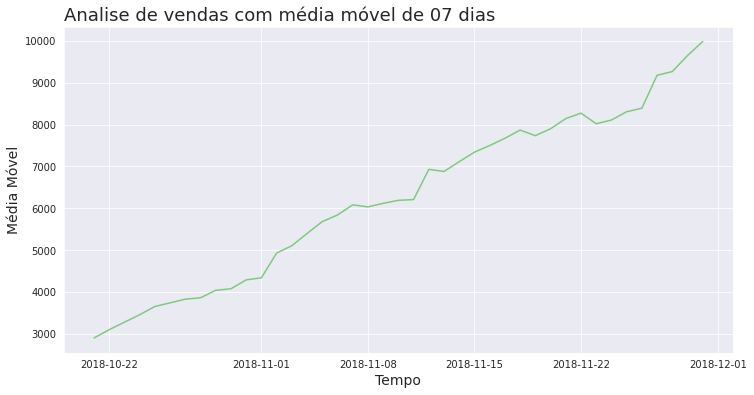

In [ ]:
line_chart('Analise de vendas com média móvel de 07 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel_21',alucel)